# The Task

* Our **Task** for this week is to fit a polynomial curve to data. This is called **curve fitting** and has numerous applications in Data Science, Statistics and Machine Learning. We will solve curve fitting in two ways: the standard one and one which is much easier using Automatic Differentiation. 
* For this week, we will try to calculate the derivatives ourselves! This will be the only time that we will do this!
* The Learning Outcome: Hands-on application of Automatic Differentiation.

## Creating the data

* Let us first create some data using a known function. We will use the **sinusoidal** function $y=f(x)=sin(x)$. 
    * x is the input to the function and y is the output of the function.
* The following code generates and plots our data. 

In [1]:
import torch
import math
import matplotlib.pyplot as plt
%matplotlib inline

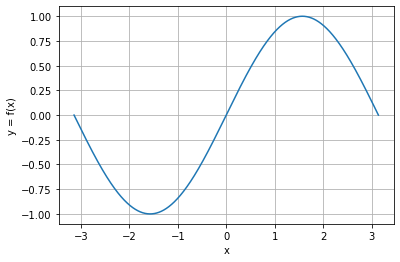

In [2]:
# Create input data x and output (target) data y
N = 2000 # number of samples
x = torch.linspace(-math.pi, math.pi, N, dtype=torch.float32)
y = torch.sin(x);
plt.plot(x, y);
plt.grid();
plt.xlabel('x');
plt.ylabel('y = f(x)');

## The Task

* Let's assume that we do not know the function that generated the target $y$ from input $x$. That is we do not know that $y$ and $x$ are related through the function $y=sin(x)$.
* We are just given the value pais $(x_i, y_i), i=1,\dots,N$.
* Our goal is find a polynomial curve that can fit the pais $(x_i, y_i)$ as accurately as possible.
* A polynomial (of degree 3) is given by the following formula:
$$P_3(x)= w_0 + w_1x + w_2x^2 + w_3x^3$$
where $w_0, w_1, w_2, w_3$ are the weights (our model parameters).
* By changing the weights different polynomial curves can be obtained!

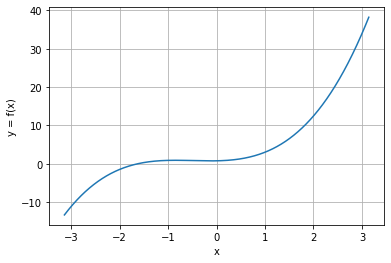

In [3]:
# Run this cell multiple times to see how different polynomial curves look like 

# Randomly initialize weights
w0 = torch.randn((), dtype=torch.float32)
w1 = torch.randn((), dtype=torch.float32)
w2 = torch.randn((), dtype=torch.float32)
w3 = torch.randn((), dtype=torch.float32)
y_hat = w0 + w1 * x + w2 * x ** 2 + w3 * x ** 3

# Plot the polynomial curve 
plt.plot(x, y_hat);
plt.grid();
plt.xlabel('x');
plt.ylabel('y = f(x)');

## The Algorithm  
* We want to find the weights so that the polynomial curve becomes "as close as possible" to the sinusodial function. 
* "As close as possible" is defined with the $L_2$ loss: $$L_2=\sum_{i=1}^N (\tilde{y}_i - y_i)^2$$ where $\tilde{y}_i =w_0 + w_1x_i + w_2x_i^2 + w_3x_i^3$
* To set up an algorithm to find the weights, we need to write some code that will compute the derivative of the loss with respect to the weights.
* But first we actually need the math formulas that express the derivative of the loss with respect to each weight. This is what today's lab is all about.
* Your task: calculate the partial derivative of the loss with respect to each of the weights:
  $$\frac{\theta L}{\theta w_0} = \textrm {grad_} w_0= \sum_{i=1}^N \textrm {grad_} \tilde{y}_i,$$
  $$\frac{\theta L}{\theta w_1} = \textrm {grad_} w_1= \sum_{i=1}^N \textrm {grad_} \tilde{y}_ix_i,$$
  $$\frac{\theta L}{\theta w_2} = \textrm {grad_} w_2= \sum_{i=1}^N \textrm {grad_} \tilde{y}_ix_i^2,$$
  $$\frac{\theta L}{\theta w_3} = \textrm {grad_} w_3= \sum_{i=1}^N \textrm {grad_} \tilde{y}_ix_i^3.$$    
* We will see how to use the above formulas to set up an algorithm next week.